# Question 5: RNN - LSTM
- Use AAPL.csv dataset or dowload from link https://finance.yahoo.com/quote/AAPL/history?period1=1479081600&period2=1605312000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
- Requirement:
  + Build a model to predict the tomorrow's Open value based on the today's Open value.

# 0.Mount drive & Import packages

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question5_RNN'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question5_RNN


In [ ]:
# LSTM for air pollution problem with regression framing
import pandas as pd
import numpy
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# fix random seed
numpy.random.seed(7)

# 1. Load & prepare data

In [ ]:
#load dataset
dataframe = pd.read_csv('AAPL.csv', index_col=0)
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [ ]:
dataset = dataframe[['Open']]
dataset = dataset.values.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
#split into train and test set
train_size = int(len(dataset) *0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX[:5])
print(trainY[:5])

[[0.00256878]
 [0.        ]
 [0.00029293]
 [0.00730075]
 [0.00709796]]
[0.         0.00029293 0.00730075 0.00709796 0.00799929]


In [ ]:
print(testX[:5])
print(testY[:5])

[[0.22781047]
 [0.23055953]
 [0.22738233]
 [0.22959062]
 [0.23026657]]
[0.23055953 0.22738233 0.22959062 0.23026657 0.247527  ]


In [ ]:
# reshape input to be [samples, time steps, features] 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 2. Build RNN network

### 2.1 Model 1

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(1,look_back)))  #64..
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


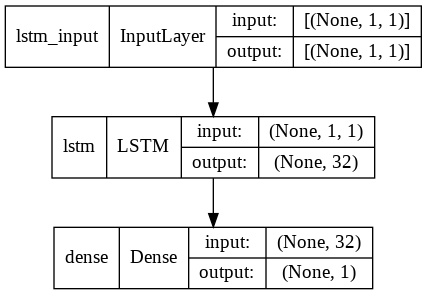

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='AAPL_one_to_one_model.png', show_shapes=True)
Image(filename='AAPL_one_to_one_model.png')

In [ ]:
# Early Stopping 
from tensorflow.keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(     min_delta=0.0001, # minimium amount of change to count as an improvement     
                               patience=20, # how many epochs to wait before stopping     
                               restore_best_weights=True, )

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY),
                    epochs=50,
                    batch_size=128,
                    callbacks=early_stopping,
                    )

Epoch 1/50
6/6 [==============================] - 3s 125ms/step - loss: 0.0188 - val_loss: 0.2083
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0144 - val_loss: 0.1868
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0107 - val_loss: 0.1666
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0077 - val_loss: 0.1481
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.1315
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0039 - val_loss: 0.1173
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 0.1058
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.0969
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0907
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0868
Epoch 11/50
6/6 [==============

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,val_loss
45,0.000884,0.025805
46,0.000840,0.023842
47,0.000796,0.022187
48,0.000754,0.020701
49,0.000714,0.019199


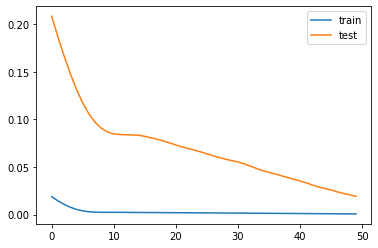

In [ ]:
# plot history 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend() 
plt.show()

### 2.2 Model 2

In [ ]:
model2 = Sequential()
model2.add(LSTM(64, input_shape=(1,look_back)))  
model2.add(Dense(1))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


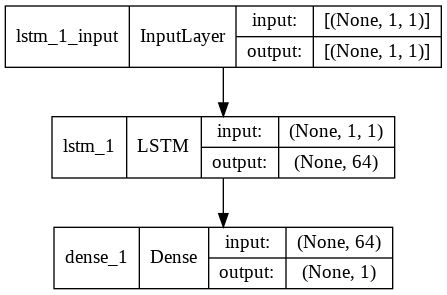

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model2, to_file='AAPL_one_to_one_model2.png', show_shapes=True)
Image(filename='AAPL_one_to_one_model2.png')

In [ ]:
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit(trainX, trainY, 
                    validation_data=(testX, testY),
                    epochs=50,
                    batch_size=1,
                    callbacks=early_stopping,
                    verbose=0
                    )

In [ ]:
history2_df = pd.DataFrame(history2.history)
history2_df.tail()

,loss,val_loss
18,0.000050,0.000807
19,0.000048,0.000643
20,0.000050,0.000711
21,0.000047,0.000664
22,0.000051,0.000452


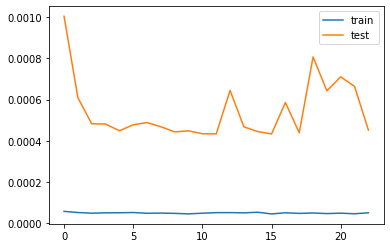

In [ ]:
# plot history 
plt.plot(history2.history['loss'], label='train') 
plt.plot(history2.history['val_loss'], label='test') 
plt.legend() 
plt.show()

### Nhận xét:
- Model2 cho loss & val_loss thấp hơn Model 1 nên chọn để Predict

# 3. Evaluate & Prediction

In [ ]:
#make prediction
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

In [ ]:
trainPredict[:5]

array([[0.00598486],
       [0.00352421],
       [0.00380474],
       [0.01052096],
       [0.01032648]], dtype=float32)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainY[0][:5]

array([26.64249951, 26.67499903, 27.45249934, 27.43000031, 27.53000022])

In [ ]:
trainPredict[:5]

array([[27.306505],
       [27.033503],
       [27.064627],
       [27.809774],
       [27.788197]], dtype=float32)

In [ ]:
#calculate rmse
train_mse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' %(train_mse))
test_mse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' %(test_mse))

Train RMSE: 0.67 RMSE
Test RMSE: 2.44 RMSE


In [ ]:
train_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train MAE: %.2f MAE' %(train_mae))
test_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('Test MAE: %.2f MAE' %(test_mae))

Train MAE: 0.47 MAE
Test MAE: 1.60 MAE


### Nhận xét:
- sai số (RMSE, MAE) trên cả train và test đều rất nhỏ => mô hình phù hợp


In [ ]:
# shift train predictions for plotting 
trainPredictPlot = numpy.empty_like(dataset) 
trainPredictPlot[:, :] = numpy.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict 
# shift test predictions for plotting 
testPredictPlot = numpy.empty_like(dataset) 
testPredictPlot[:, :] = numpy.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

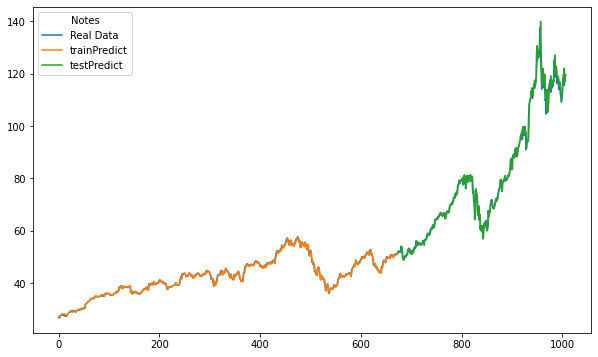

In [ ]:
# plot baseline and predictions 
plt.figure(figsize=(10,6)) 
plt.plot(scaler.inverse_transform(dataset), label='Real Data') 
plt.plot(trainPredictPlot, label='trainPredict') 
plt.plot(testPredictPlot, label='testPredict') 
plt.legend(title="Notes") 
plt.show()

In [ ]:
# Save the result
model2.save('AAPL_one_to_one.h5')